In [3]:
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['cf807027e00d476eb027633d5d3d9411.f-id.b305400c5be9486497527f18a0f6c085']
ds = experiment.get_intermediate_dataset(
    node_id='b86a34af-b760-4bf7-92ec-5655c037ce48-2712',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

In [4]:
frame

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,dayOfWeek,days
0,1,0,1,0,0,0,1,-1.334648,0.947372,-1.553889,16,Sat,0
1,1,0,1,1,0,0,1,-1.438516,0.895539,-1.553889,40,Sat,0
2,1,0,1,2,0,0,1,-1.438516,0.895539,-1.553889,32,Sat,0
3,1,0,1,3,0,0,1,-1.334648,0.636370,-1.553889,13,Sat,0
4,1,0,1,4,0,0,1,-1.334648,0.636370,-1.553889,1,Sat,0
5,1,0,1,5,0,0,2,-1.334648,0.636370,-0.821484,1,Sat,0
6,1,0,1,6,0,0,1,-1.438516,0.895539,-1.553889,2,Sat,0
7,1,0,1,7,0,0,1,-1.542385,1.206542,-1.553889,3,Sat,0
8,1,0,1,8,0,0,1,-1.334648,0.636370,-1.553889,8,Sat,0
9,1,0,1,9,0,0,1,-0.919172,0.688203,-1.553889,14,Sat,0


In [6]:
num_cols = ["temp", "hum", "windspeed", "hr"] 
           
def bike_scatter(df, cols):
    import matplotlib.pyplot as plt
    import statsmodels.nonparametric.smoothers_lowess as lw
    
    ## Loop over the columns and create the scatter plots
    for col in cols:
        ## first compute a lowess fit to the data
        los = lw.lowess(df['cnt'], df[col], frac = 0.3)
    
        ## Now make the plots
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df.plot(kind = 'scatter', x = col, y = 'cnt', ax = ax, alpha = 0.05)
        plt.plot(los[:, 0], los[:, 1], axes = ax, color = 'red')
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)    
    return 'Done'        

cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday',
           'workingday', 'weathersit', 'dayOfWeek']
    
def bike_box(df, cols):
    import matplotlib.pyplot as plt
    
    ## Loop over the columns and create the box plots
    for col in cols:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df.boxplot(column = 'cnt', by = col, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of bikes')
        ax.set_title('Number of bikes vs. ' + col)    
    return 'Done'
 
plt_times = [6, 8, 10, 12, 14, 16, 18, 20]
def bike_series(df, tms):
    import matplotlib.pyplot as plt
        
    lims = (min(df.cnt), max(df.cnt))   
    for t in tms:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[df.hr == t].plot(kind = 'line', x = 'days', y = 'cnt',
                            ylim = lims, ax = ax)    
        plt.xlabel("Days from start")
        plt.ylabel("Bikes rented")
        plt.title("Bikes rented by day for hour = " + str(t))
    return 'Done'
  
hist_cols = ["cnt", "temp", "hum", "windspeed"] 
def bike_hist(df, cols):    
    import matplotlib.pyplot as plt
    
    ## Loop over columns and plot histograms
    for col in cols:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[col].hist(bins = 30, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col) 
    
    return 'Done'
   
def bike_hist_cond(df, col, by):
    import matplotlib.pyplot as plt
    
    df = df[df.hr.isin(by)]
    ## Plot conditioned histograms
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    df[[col, 'hr']].hist(bins = 30, by = ['hr'], ax = ax)
    return 'Done'
     

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/artist.py:210: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


'Done'

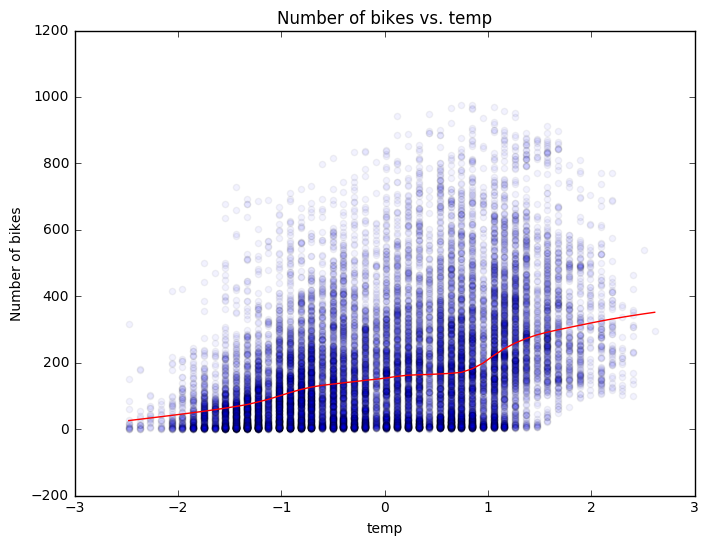

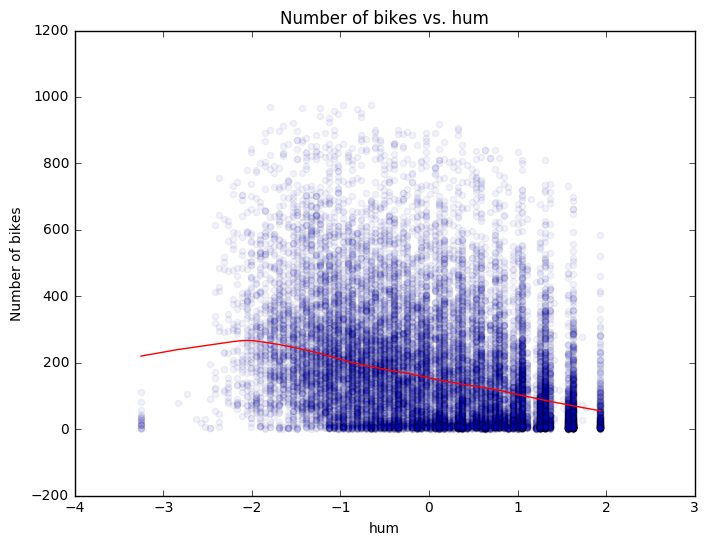

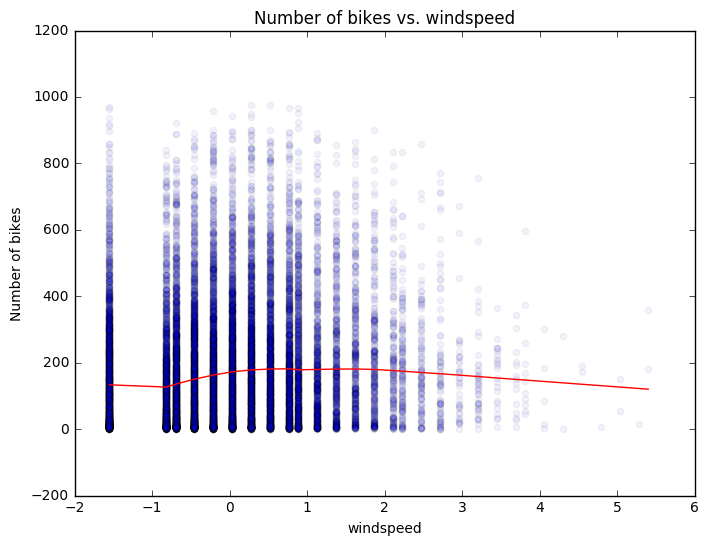

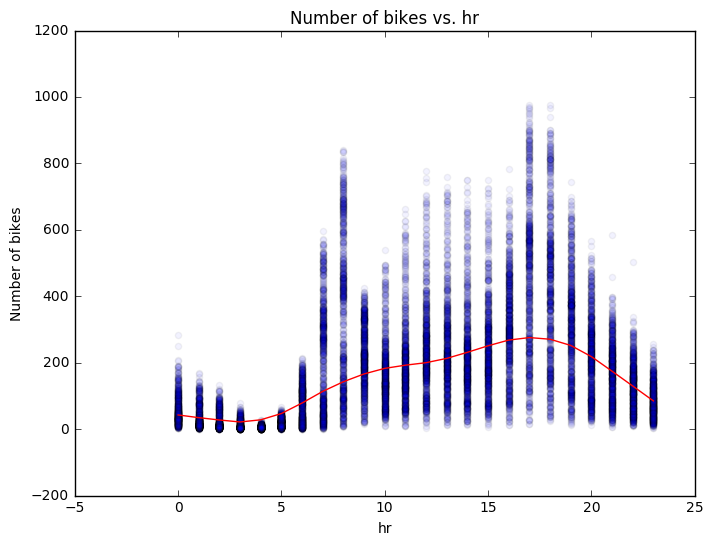

In [7]:
%matplotlib inline
bike_scatter(frame, num_cols)

'Done'

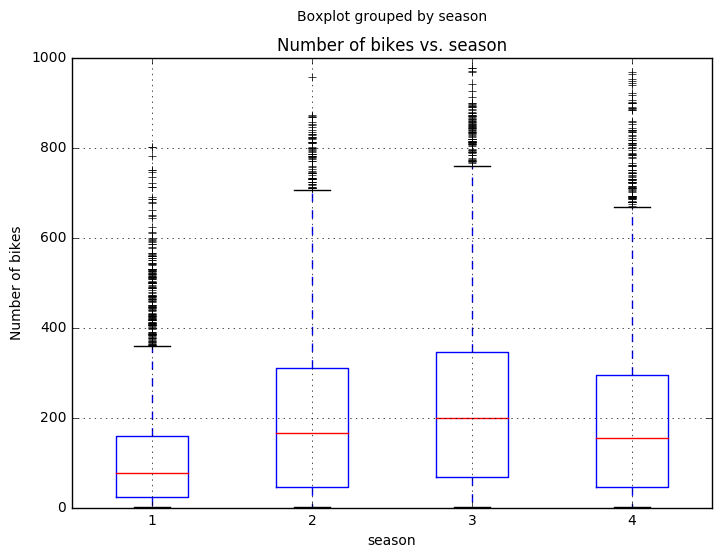

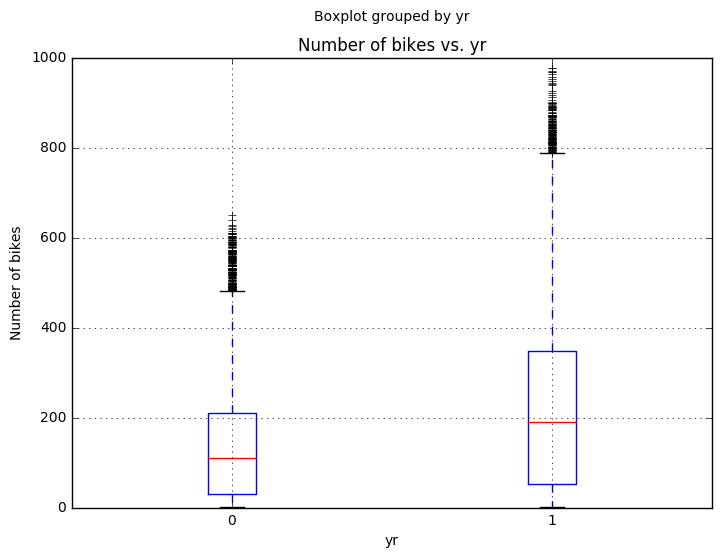

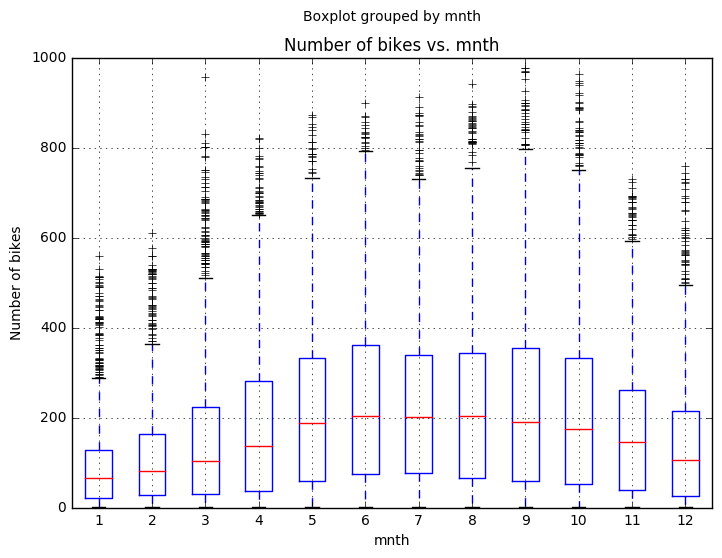

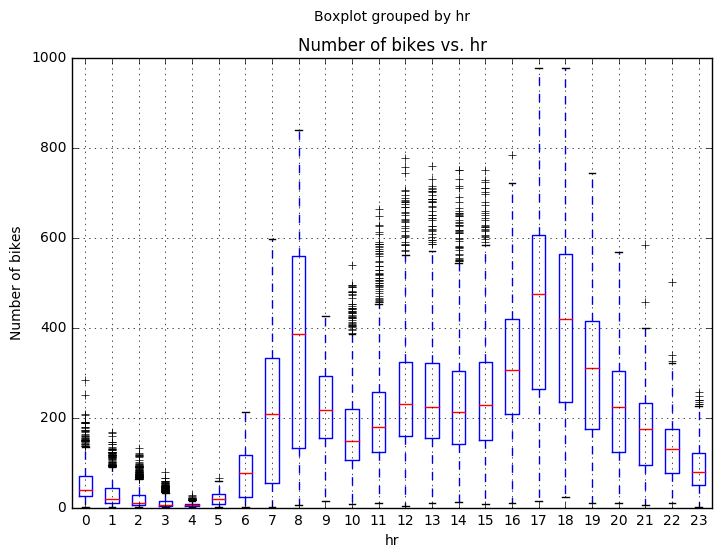

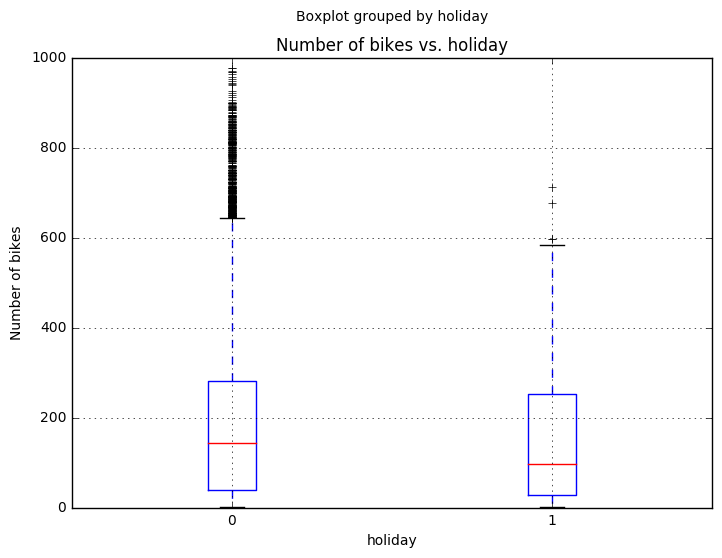

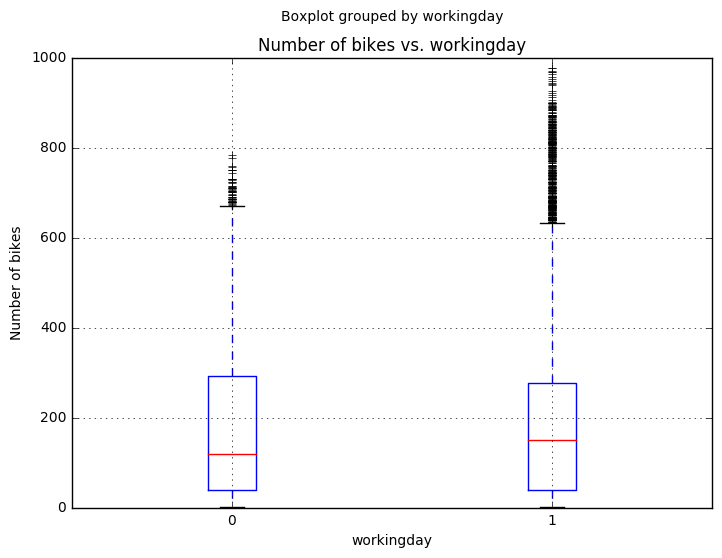

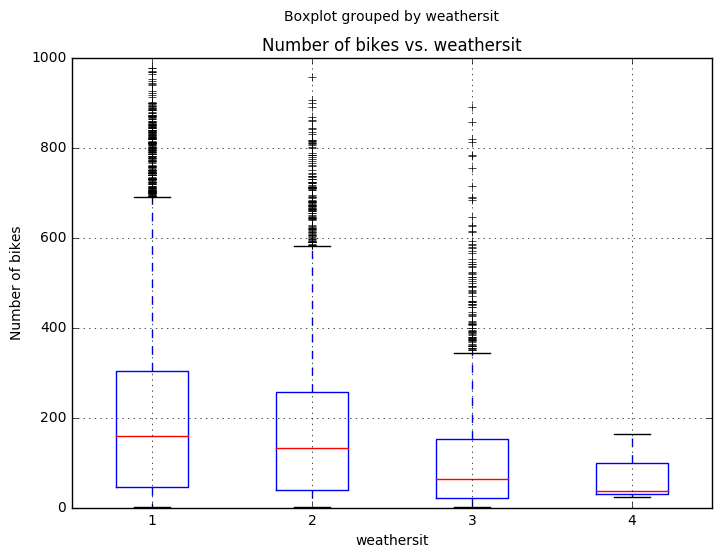

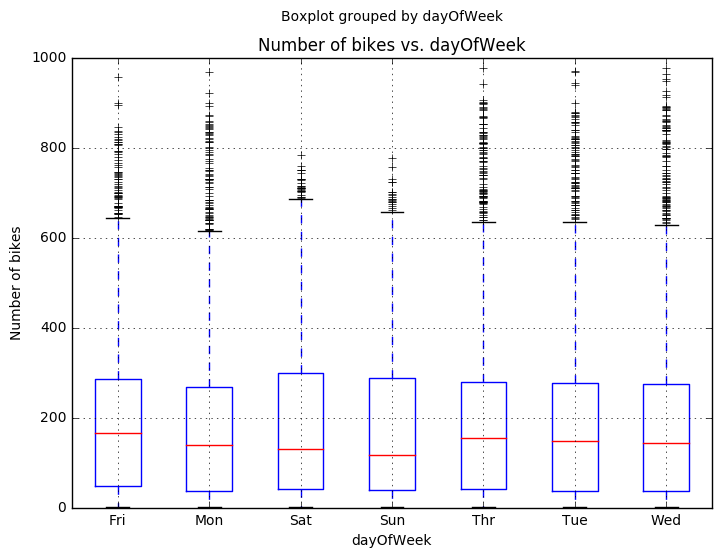

In [8]:
bike_box(frame, cat_cols)

'Done'

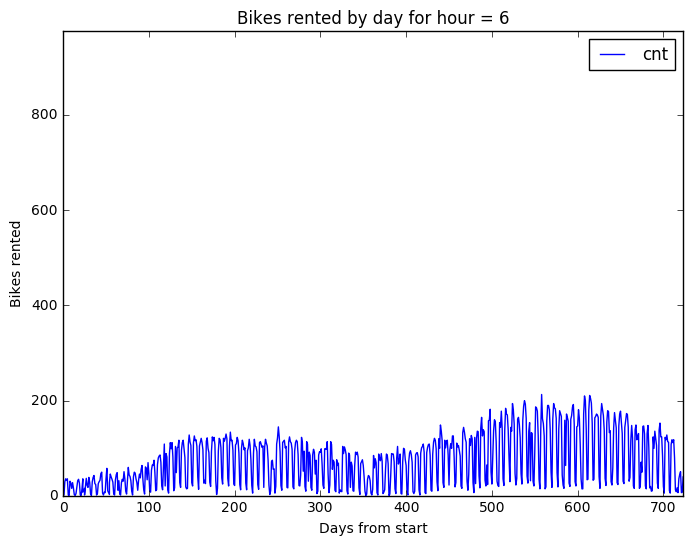

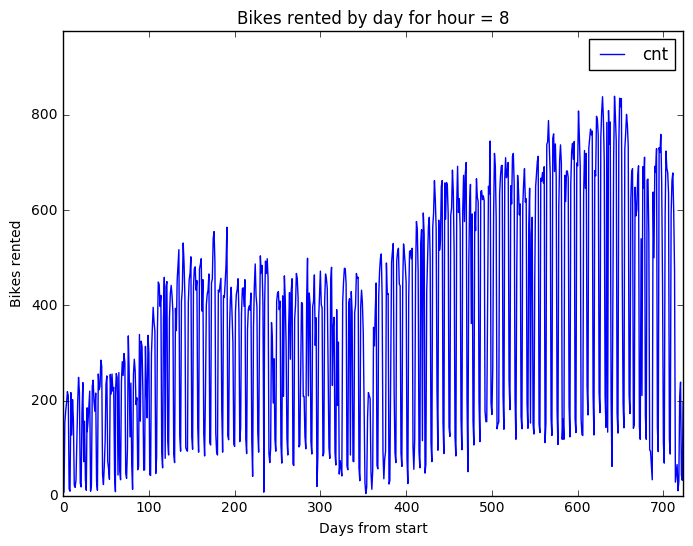

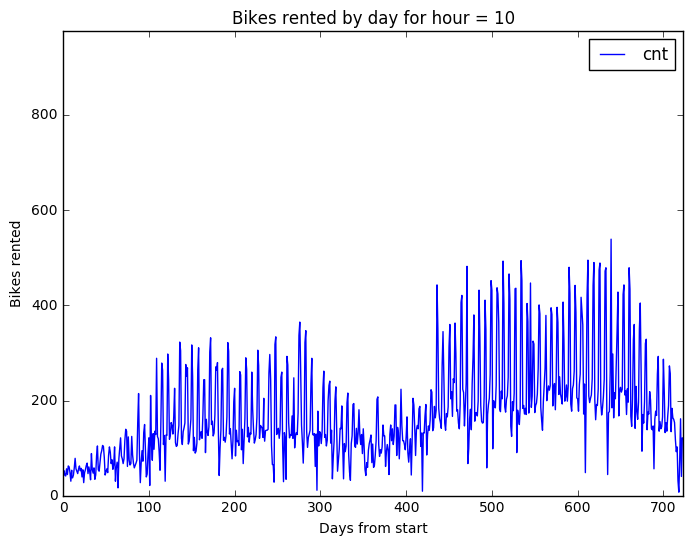

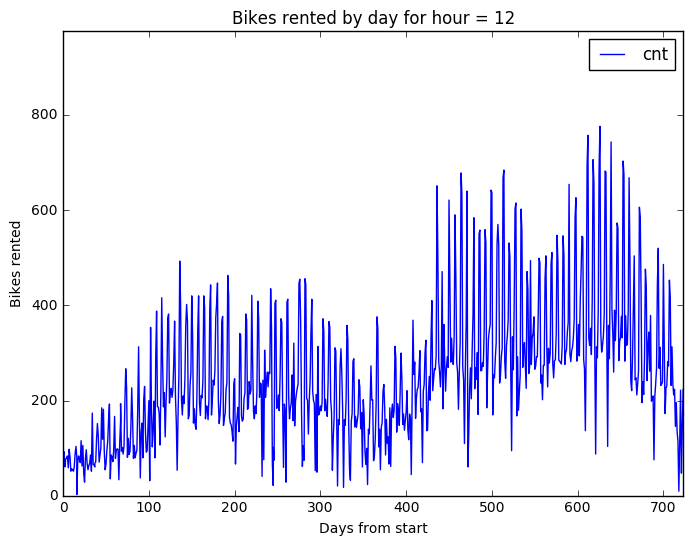

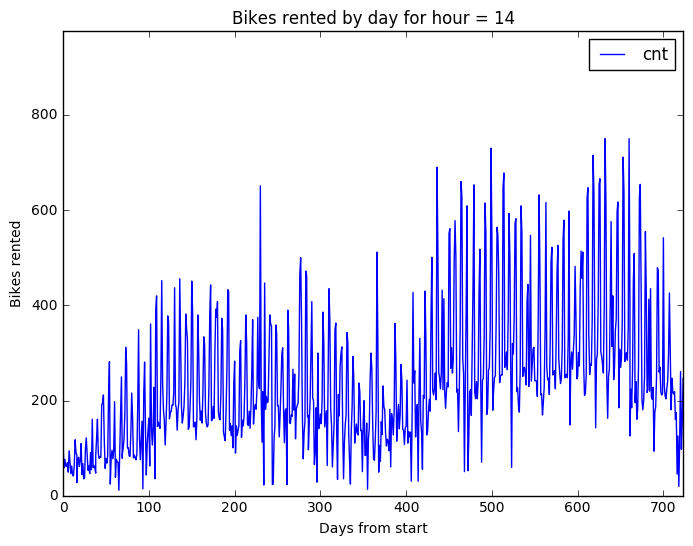

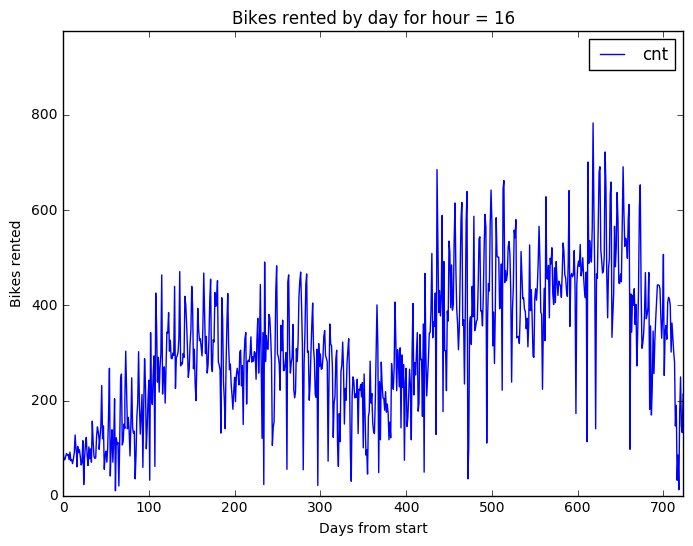

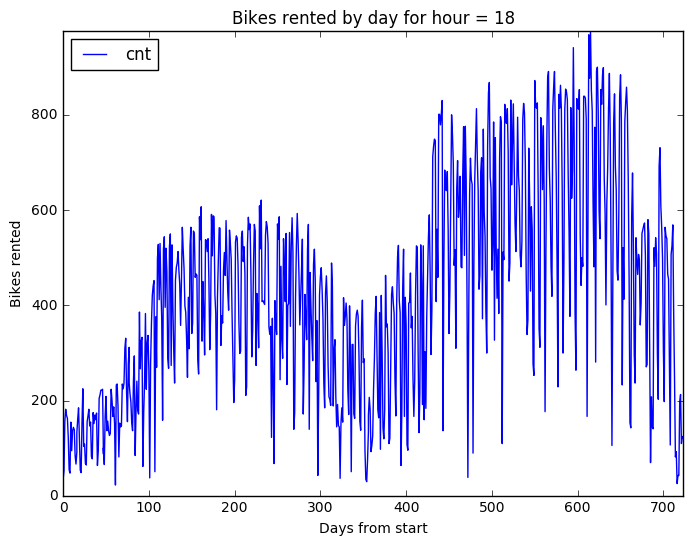

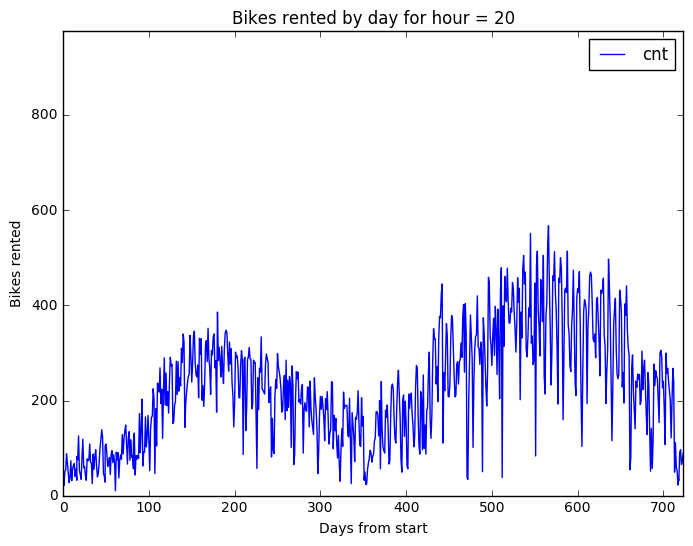

In [9]:
bike_series(frame, plt_times)

'Done'

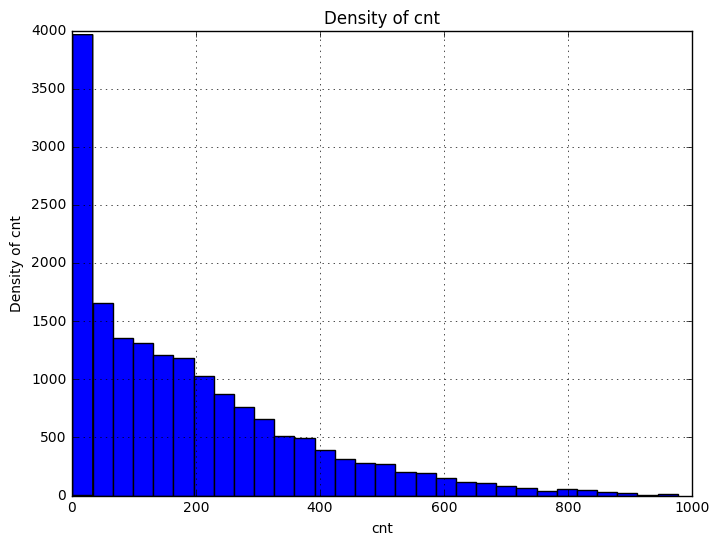

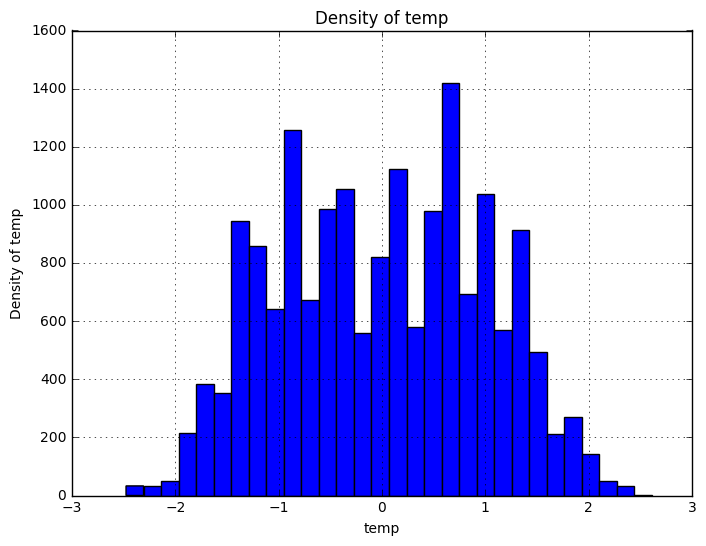

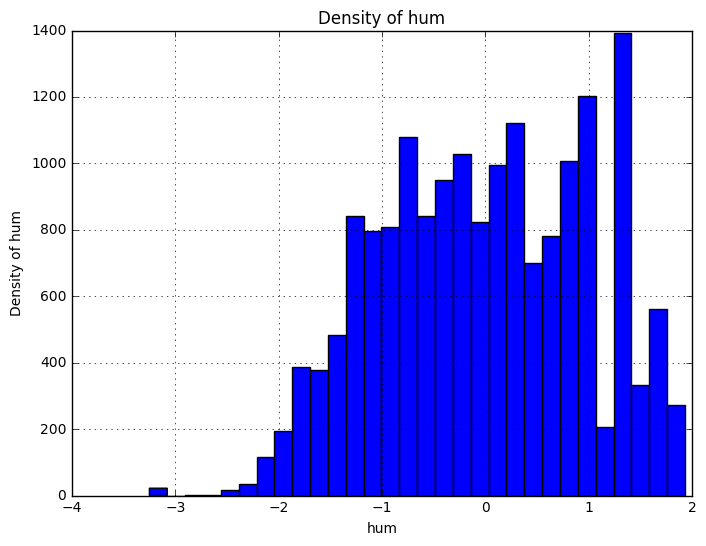

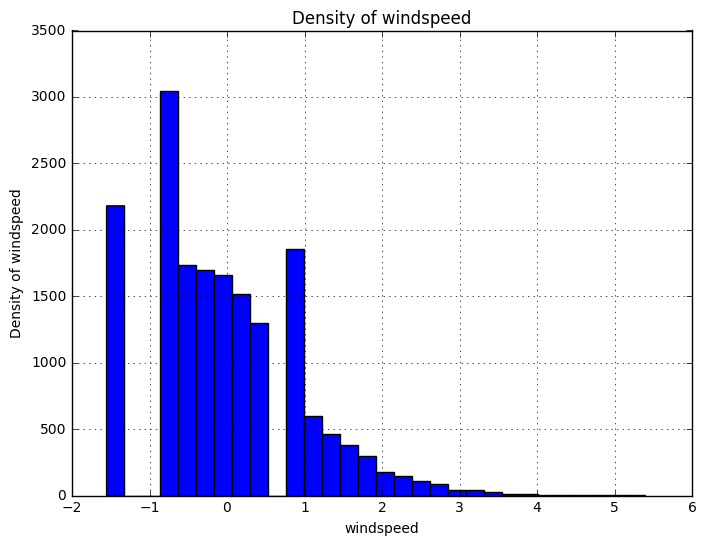

In [10]:
bike_hist(frame, hist_cols)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/pandas/tools/plotting.py:2909: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


'Done'

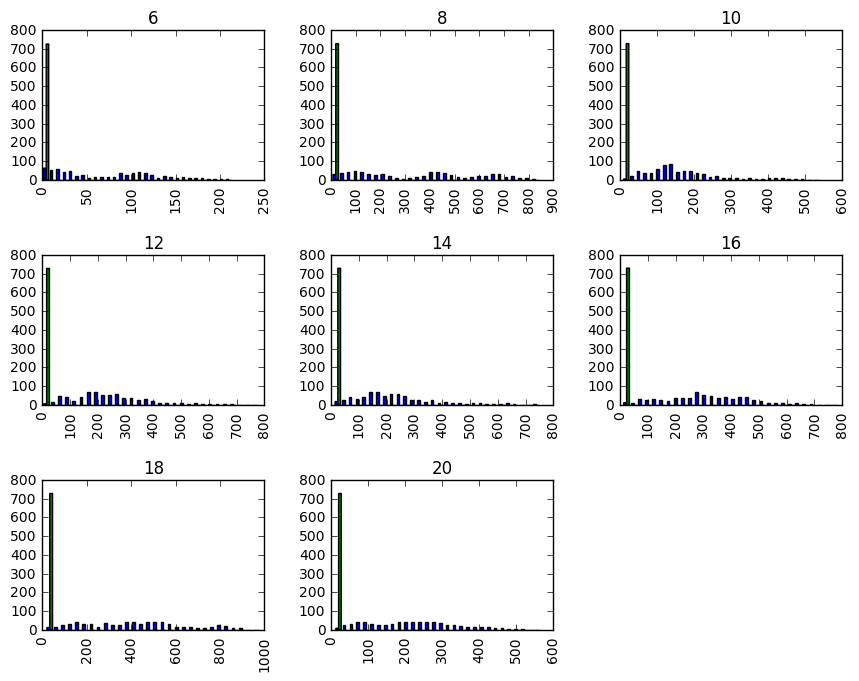

In [11]:
bike_hist_cond(frame, 'cnt', plt_times)